#P-169 Gold Price Forecast
#(Forecasting Model)

#1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import statsmodels.api as sm

 # Supressing warnings

import warnings             
warnings.filterwarnings('ignore')

#2) Import Dataset

In [2]:
#Load the data
df = pd.read_csv(r"D:\ExcelR\Project GOLD\Gold_data.csv",
                 parse_dates = ['date'],
                )

In [3]:
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


+ We have imported the Dataset for Forecasting Model - Gold Price using Pandas. 
+ This Data Set contains 2182 Rows and 2 Columns
+ Date Range - From 01/01/2016 To 21/12/2021. We Have total 5 year data.

#3)EDA (Data Pre-Processing)

In [4]:
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [5]:
#Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [6]:
df.shape

(2182, 2)

In [7]:
# Describe the data - Descriptive statistics.
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [8]:
df.median()

price    2879.8
dtype: float64

In [9]:
df.mode()

,date,price
0,2016-01-01,2598.7
1,2016-01-02,2892.7
2,2016-01-03,NaN
3,2016-01-04,NaN
4,2016-01-05,NaN
...,...,...
2177,2021-12-17,NaN
2178,2021-12-18,NaN
2179,2021-12-19,NaN
2180,2021-12-20,NaN


In [10]:
# Finding Duplicated values / Null Values 

In [11]:
# Null values

df.isnull().sum()

date     0
price    0
dtype: int64

In [12]:
# Duplicate Values

df.duplicated().sum()

0

It shows there is no Null and Duplicated values in the dataset

In [13]:
# Know the datatypes
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [14]:
# Unique Values in the data
df['date'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', ...,
       '2021-12-19T00:00:00.000000000', '2021-12-20T00:00:00.000000000',
       '2021-12-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [15]:
df['price'].unique()

array([2252.6, 2454.5, 2708.1, ..., 4389.5, 4354.1, 4346.5])

In [16]:
# Correlation 
df.corr()

,price
price,1.0


#Visualization of Data

Line Plot

In [17]:
df_eda = df.copy()
df_eda.set_index('date', inplace=True)

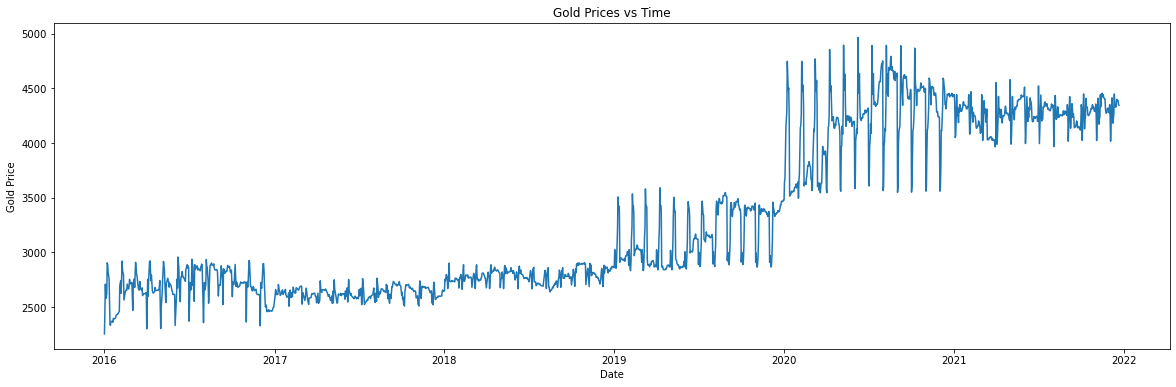

In [18]:
# line plot
plt.figure(figsize=(20, 6))
sns.lineplot(y='price', x='date', data=df);
plt.title('Gold Prices vs Time');
plt.xlabel('Date');
plt.ylabel('Gold Price');

Histogram

(array([ 65., 780., 422.,  49., 187.,  35., 104., 378., 146.,  16.]),
 array([2252.6 , 2523.97, 2795.34, 3066.71, 3338.08, 3609.45, 3880.82,
        4152.19, 4423.56, 4694.93, 4966.3 ]),
 <BarContainer object of 10 artists>)

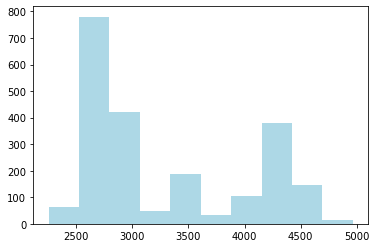

In [19]:
plt.hist(df['price'],color='lightblue')

From above visual trend we can see that the data has different trend at Different levels hence it is Non-Stationary

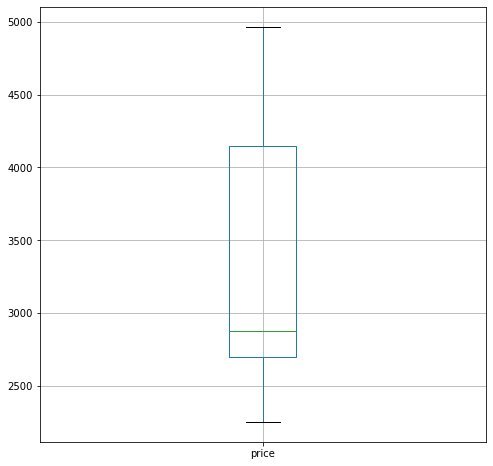

In [20]:
### you can create a box plot for any numerical column using a single line of code.
box=df.boxplot(figsize=(8,8))

No outlier in the dataset

Displot 
To check Normality in the data

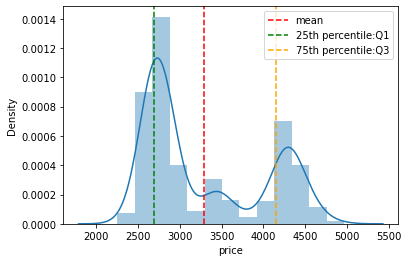

In [21]:
sns.distplot(df['price'])
plt.axvline(x=np.mean(df['price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

Scatter plot

<Figure size 2160x576 with 0 Axes>

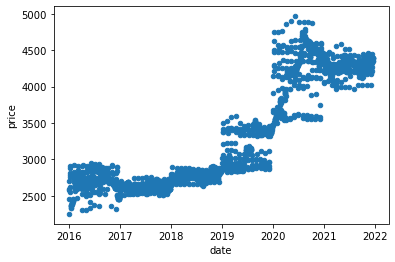

In [22]:
plt.figure(figsize=(30,8))
df.plot(kind='scatter',x='date',y='price')
plt.show()

 Observation :
From above visualization we can see that there is variation in the gold price  .

Let visualizing the sum of all sales each year. We can do that using group of “Price” and “Date” and group by “Year”.

In [23]:
df=df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
df_year = df[['price','year']].groupby(by='year').sum().reset_index()

df_year

,year,price
0,2016,9.847648e+05
1,2017,9.587369e+05
2,2018,1.015407e+06
3,2019,1.149827e+06
4,2020,1.543195e+06
5,2021,1.514739e+06


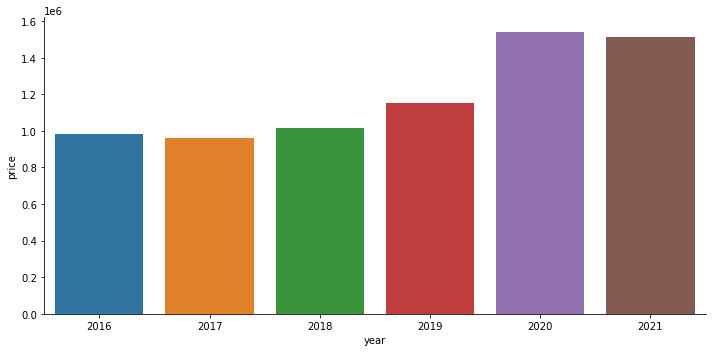

In [24]:
sns.catplot(x='year',y='price',data=df_year,kind='bar',aspect=2)

Monthly & Yearly Gold Price (TREND & SEASONALITY)

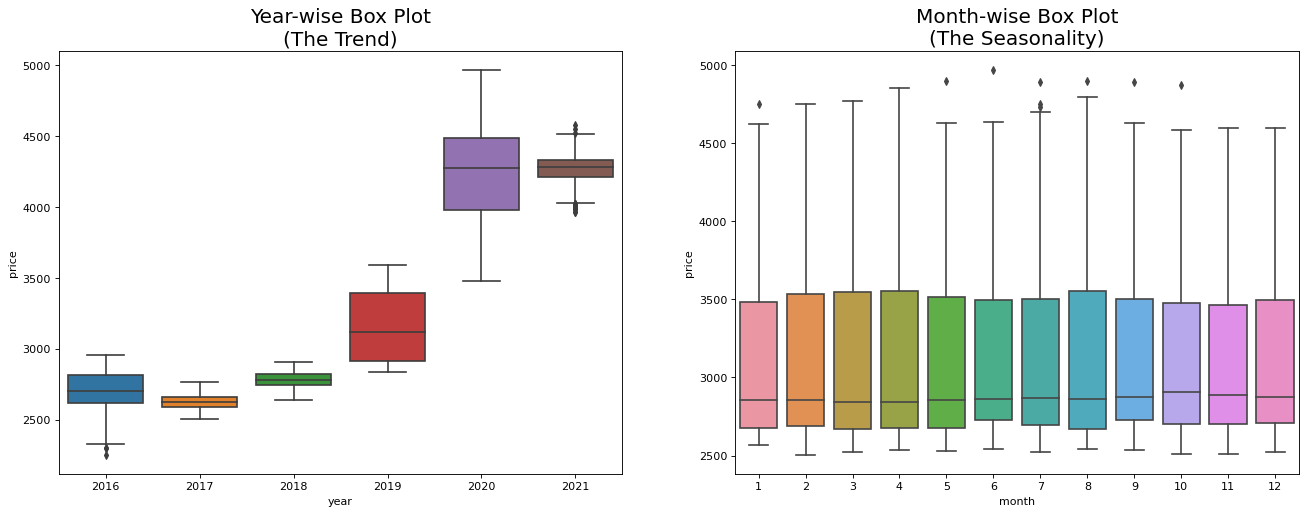

In [25]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='price', data=df, ax=axes[0])
sns.boxplot(x='month', y='price', data=df.loc[~df.year.isin([2016, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Weekly Gold Price

[Text(0.5, 1.0, 'Weekly Gold Price')]

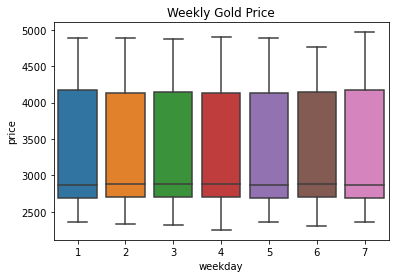

In [26]:
plot = sns.boxplot(x='weekday', y='price', data=df)
plot.set(title='Weekly Gold Price')

Correlation Plot - EDA

Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [27]:
df.corr()

,price,year,month,day,weekday
price,1.000000,0.880318,0.075041,0.023311,-0.000928
year,0.880318,1.000000,-0.010417,-0.008684,-0.000735
month,0.075041,-0.010417,1.000000,0.001173,0.002167
day,0.023311,-0.008684,0.001173,1.000000,-0.002243
weekday,-0.000928,-0.000735,0.002167,-0.002243,1.000000


This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated

<function matplotlib.pyplot.show(close=None, block=None)>

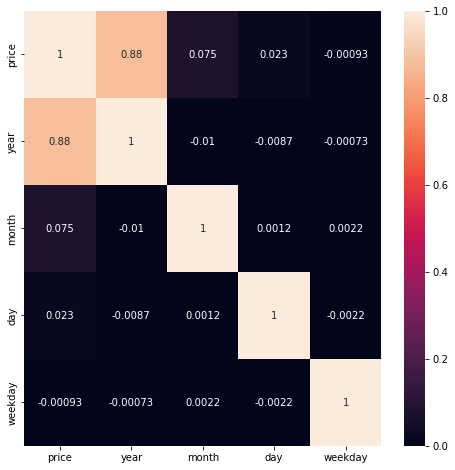

In [28]:
#Correlation plot

corr_matrix = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(data= corr_matrix,annot=True,vmin=0)
plt.show

# Feature Enggineering

In [29]:
# Making thr date as DateTime index for the DataFrame

df1 = df.copy()
df1.set_index('date',inplace=True)
df1.index.year

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=2182)

In [30]:
visual = df1.copy()
visual.reset_index(inplace=True)
visual['date'] = pd.to_datetime(visual['date'])
visual['year'] = visual['date'].dt.year
visual['month'] = visual['date'].dt.month
visual['week'] = visual['date'].dt.isocalendar().week
visual['quarter'] = visual['date'].dt.quarter
visual['day_of_week'] = visual['date'].dt.day_name()
visual.drop('date', axis =1 , inplace= True)
visual.head(10)

,price,year,month,day,weekday,week,quarter,day_of_week
0,2252.60,2016,1,1,4,53,1,Friday
1,2454.50,2016,1,2,5,53,1,Saturday
2,2708.10,2016,1,3,6,53,1,Sunday
3,2577.80,2016,1,4,7,1,1,Monday
4,2597.75,2016,1,5,1,1,1,Tuesday
5,2617.70,2016,1,6,2,1,1,Wednesday
6,2903.80,2016,1,7,3,1,1,Thursday
7,2887.80,2016,1,8,4,1,1,Friday
8,2813.80,2016,1,9,5,1,1,Saturday
9,2786.80,2016,1,10,6,1,1,Sunday


In [31]:
visual.year.unique

<bound method Series.unique of 0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
2177    2021
2178    2021
2179    2021
2180    2021
2181    2021
Name: year, Length: 2182, dtype: int64>

Average Price of Gold for each year

In [32]:
df_2016 = visual[visual['year']==2016][['month','price']]
df_2016 = df_2016.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2016'})
df_2017 = visual[visual['year']==2017][['month','price']]
df_2017 = df_2017.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2017'})
df_2018 = visual[visual['year']==2018][['month','price']]
df_2018 = df_2018.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2018'})
df_2019 = visual[visual['year']==2019][['month','price']]
df_2019 = df_2019.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2019'})
df_2020 = visual[visual['year']==2020][['month','price']]
df_2020 = df_2020.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2020'})
df_2021 = visual[visual['year']==2021][['month','price']]
df_2021 = df_2021.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2021'})

df_year = df_2016.merge(df_2017,on='month').merge(df_2018,on='month').merge(df_2019,on='month').merge(df_2020,on='month')\
.merge(df_2021,on='month')

In [33]:
import plotly.graph_objects as go

# top levels
top_labels = ['2016', '2017', '2018', '2019', '2020','2021']

colors = ['rgb(6, 19, 14)', 'rgb(18, 58, 43)',
          'rgb(31, 97, 71)', 'rgb(43, 136, 100)',
          'rgb(55, 174, 129)','rgb(81, 200, 154)',
          'rgb(119, 212, 176)','rgb(158, 224, 199)']

# X axis value 
df_year = df_year[['2016', '2017', '2018', '2019', '2020','2021']].replace(np.nan,0)
x_data = df_year.values

# y axis value (Month)
df_2016['month'] =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_data = df_2016['month'].tolist()

fig = go.Figure()
for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

In [34]:
fig.update_layout(title='Avg Price for each Year',
    xaxis=dict(showgrid=False, 
               zeroline=False, domain=[0.15, 1]),
    yaxis=dict(showgrid=False, showline=False,
               showticklabels=False, zeroline=False),
    barmode='stack', 
    template="plotly_white",
    margin=dict(l=0, r=50, t=100, b=10),
    showlegend=False, 
)

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                          showarrow=False))
    space = xd[0]  
    for i in range(1, len(xd)):
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]
fig.update_layout(
    annotations=annotations)
fig.show()

Observation:

*   Highest prices of gold  are  in Auguest to December and the decreased in January to March
*   Price are increasing gradually from 2019 to 2021

Charts for visualise the Month,Quarter and week wise Price of Gold

In [35]:
# data

import calendar


df_m_sa = visual.groupby('month').agg({"price" : "mean"}).reset_index()
df_m_sa['price'] = round(df_m_sa['price'],2)
df_m_sa['month_text'] = df_m_sa['month'].apply(lambda x: calendar.month_abbr[x])
df_m_sa['text'] = df_m_sa['month_text'] + ' - ' + df_m_sa['price'].astype(str) 

df_w_sa = visual.groupby('week').agg({"price" : "mean"}).reset_index() 
df_q_sa = visual.groupby('quarter').agg({"price" : "mean"}).reset_index() 
# chart color
df_m_sa['color'] = '#496595'
df_m_sa['color'][:-1] = '#c6ccd8'
df_w_sa['color'] = '#c6ccd8'

In [36]:
from plotly.subplots import make_subplots


fig = make_subplots(rows=2, cols=2, vertical_spacing=0.1,
                    row_heights=[0.7, 0.3], 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3],
                    subplot_titles=("Month wise Avg Price Analysis", "Quarter wise Avg Price Analysis", 
                                    "Week wise Avg Price Analysis"))

fig.add_trace(go.Bar(x=df_m_sa['price'], y=df_m_sa['month'], marker=dict(color= df_m_sa['color']),
                     text=df_m_sa['text'],textposition='auto',
                     name='Month', orientation='h'), 
                     row=1, col=1)
fig.add_trace(go.Pie(values=df_q_sa['price'], labels=df_q_sa['quarter'], name='Quarter',
                     marker=dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']), hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label+percent'), 
                     row=1, col=2)
fig.add_trace(go.Scatter(x=df_w_sa['week'], y=df_w_sa['price'], mode='lines+markers', fill='tozeroy', fillcolor='#c6ccd8',
                     marker=dict(color= '#496595'), name='Week'), 
                     row=2, col=1)

# styling
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_w_sa.week, ticktext=[i for i in range(1,53)], 
                 row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=750, bargap=0.15,
                  margin=dict(b=0,r=20,l=20), 
                  title_text="Average Price Analysis",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

In [37]:
import plotly.express as px

# data
df_dw_sa = visual.groupby('day_of_week').agg({"price" : "mean"}).reset_index()
df_dw_sa.price = round(df_dw_sa.price, 2)

# chart
fig = px.bar(df_dw_sa, y='day_of_week', x='price', title='Avg Price vs Day of Week',
             color_discrete_sequence=['#00BFFF'], text='price',
             category_orders=dict(day_of_week=["Monday","Tuesday","Wednesday","Thursday", "Friday","Saturday","Sunday"]))
fig.update_yaxes(showgrid=False, ticksuffix=' ', showline=False)
fig.update_xaxes(visible=False)
fig.update_layout(margin=dict(t=60, b=0, l=0, r=0), height=350,
                  hovermode="y unified", 
                  yaxis_title=" ", template='plotly_white',
                  title_font=dict(size=25, color='#000000', family="Lato, sans-serif"),
                  font=dict(color='#000000'),
                  hoverlabel=dict(bgcolor="#c6ccd8", font_size=13, font_family="Lato, sans-serif"))

#### Observation:

+ As we saw in the above chart there is an upward trend in price of Gold over the time. Although there are ups and downs at every point in time, generally we can observe that the trend increases. Also we can notice how the ups and downs seem to be a bit regular, it means we might be observing a seasonal pattern here too. Let’s take a closer look by observing some year’s data:
+ Highest price average price is on Tuesday.
+ Auguest Month has the Highest price.

#4) Model Building

Decomposition of Time series

In [38]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

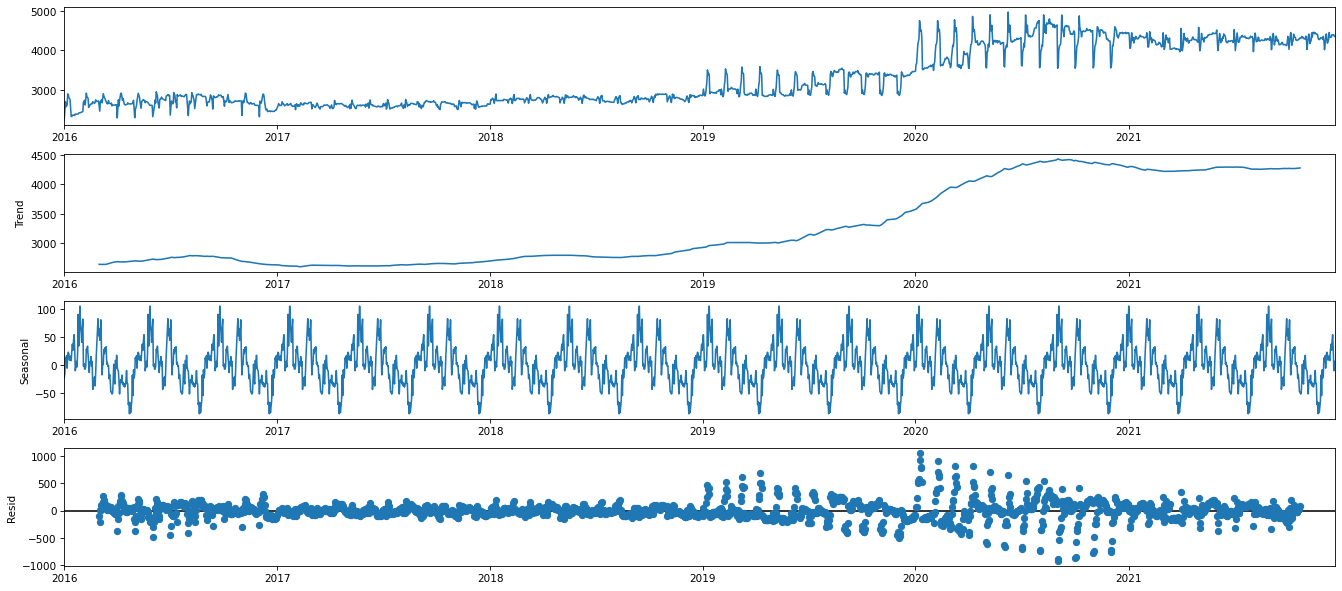

In [39]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(df_eda, model='additive', period=120)
result.plot()
plt.show()



*   Trend - Slow moving changes in a time series, Responisble for making series gradually increase or decrease over time.
*   Seasonality - Seasonal Paterns in the series. The cycles occur repeatedly over a fixed period of time.

*   Residuals - The behaviour of the time series that cannot be explained by the trend and seasonality components. Also called random errors/white noise.






####Plotting Rolling Statistics

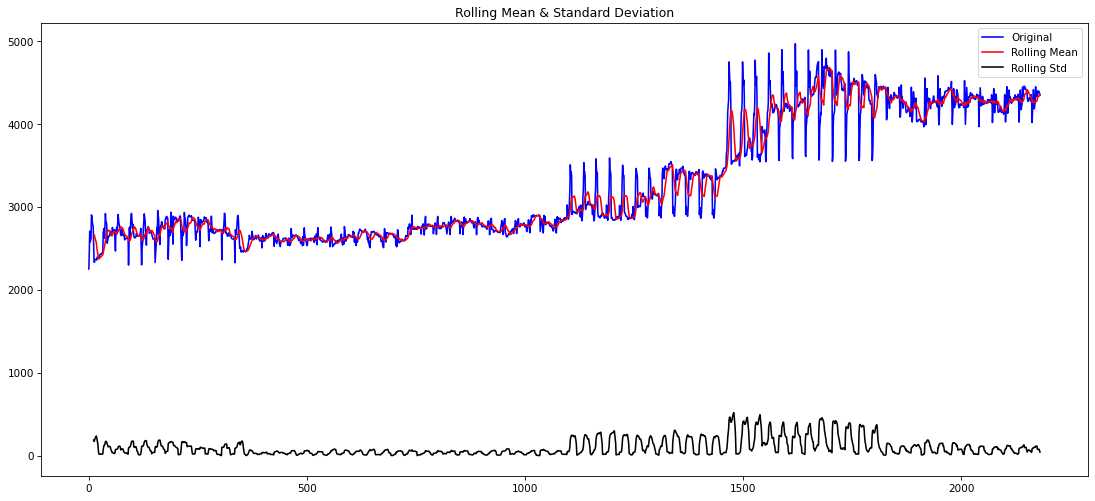

In [40]:
rolmean = df['price'].rolling(12).mean()
rolstd = df['price'].rolling(12).std()

#Plot rolling statistics:

orig = plt.plot(df['price'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

+ We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
+ The time series is hence not stationary

#Testing for Stationarity


+ Time Series is Stationary if we have constant mean, constant variance and No Trend and No Seasonality

+ But in our data set we can see uprising trend and also seasonality is present, So we can say that our data is Non-Stationary.

**ADF(Augmented Dickey-Fuller) Test**

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
test_result=adfuller(df['price'])

In [51]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print(" reject the null hypothesis.Data is stationasry")
    else:
        print(" accept null hypothesis. Data is Non-Stationary ")


In [52]:
adfuller_test(df['price'])

ADF Test Statistic : -0.30990365704574224
p-value : 0.9240899189086006
#Lags Used : 26
Number of Observations Used : 2155
 accept null hypothesis. Data is Non-Stationary 


In [53]:
df['price First Difference'] = df['price'] - df['price'].shift(1)

In [54]:
#df['Seasonal First Difference']=df['price']-df['price'].shift(30)

In [55]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.012615740227186
p-value : 1.762327840765675e-17
#Lags Used : 7
Number of Observations Used : 2144
 reject the null hypothesis.Data is stationasry


<AxesSubplot:>

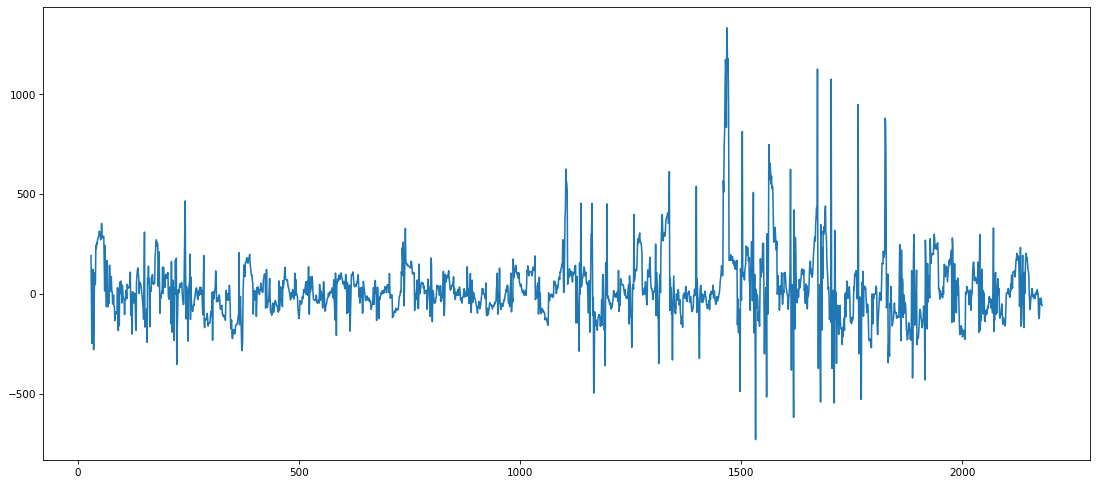

In [56]:
df['Seasonal First Difference'].plot()

In [57]:
## Again test dickey fuller test for first differencing
adfuller_test(df['price First Difference'].dropna())

ADF Test Statistic : -21.664542127244417
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 2154
 reject the null hypothesis.Data is stationasry


**Our Data is now stationary**

###ACF and PACF plots

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

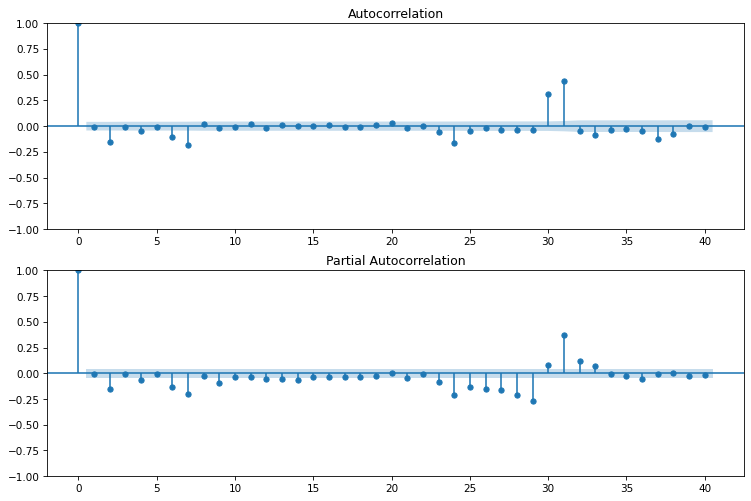

In [59]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['price First Difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['price First Difference'].iloc[1:],lags=40,ax=ax2)

###Spliting Data

In [60]:
df = pd.date_range(start='1/1/2016', end='21/12/2021', freq='M')
df

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
      

In [65]:
df = pd.read_csv(r"D:\ExcelR\Project GOLD\Gold_data.csv")
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [66]:
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [67]:
df = df.set_index('date')

In [68]:
train    =   df[df.index.year <= 2020] 
test     =   df[df.index.year > 2020]


In [69]:
print(train.shape)
print(test.shape)


(1827, 1)
(355, 1)


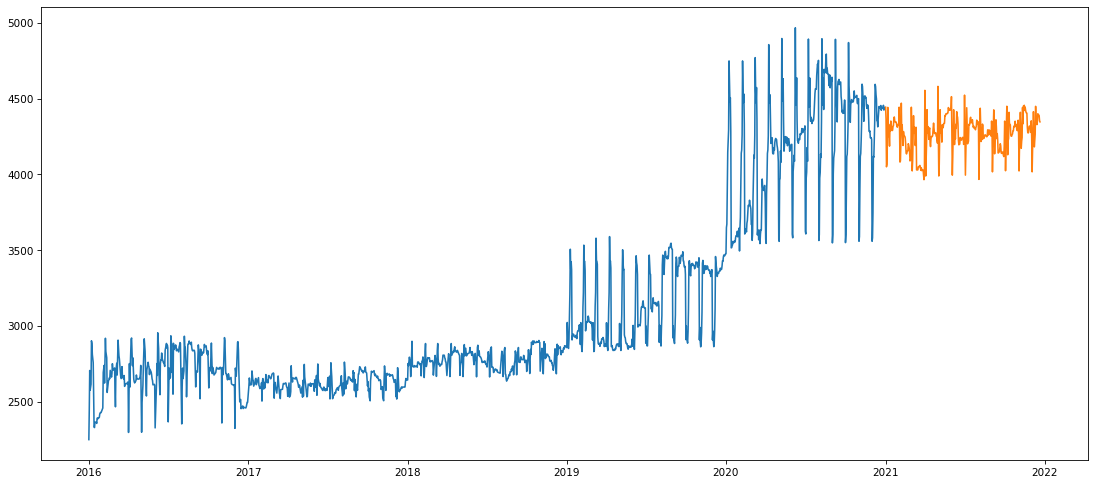

In [70]:
plt.plot(train)
plt.plot(test)
plt.show()

# ARIMA Model

In [71]:
# Figure out order for ARIMA Model
from pmdarima import auto_arima

In [72]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22374.613, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22546.376, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22548.368, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22548.362, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22544.571, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22516.950, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22518.306, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22383.062, Time=1.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22381.946, Time=2.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22538.332, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22380.067, Time=1.71 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22520.203, Time=0.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22353.710, Time=2.74 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=22336.771, Time=3.37 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1827
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -11160.289
Date:                Mon, 05 Dec 2022   AIC                          22336.579
Time:                        17:30:48   BIC                          22380.658
Sample:                    01-01-2016   HQIC                         22352.838
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1764      0.102      1.724      0.085      -0.024       0.377
ar.L1          1.3031      0.099     13.192      0.000       1.110       1.497
ar.L2         -0.5313      0.088     -6.035      0.000      -0.704      -0.359
ar.L3          0.2125      0.034      6.324      0.000       0.147       0.278
ar.L4         -0.1721      0.021     -8.331      0.000      -0.213      -0.132
ma.L1         -1.3981      0.105    -13.357      0.000      -1.603      -1.193
ma.L2          0.4243      0.102      4.157      0.000       0.224       0.624
sigma2      1.206e+04    137.488     87.691      0.000    1.18e+04    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             46951.80
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                            -1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['price'],order = (4,1,2))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1827
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -11163.532
Date:                Mon, 05 Dec 2022   AIC                          22341.065
Time:                        17:31:29   BIC                          22379.634
Sample:                    01-01-2016   HQIC                         22355.292
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3390      0.094     14.216      0.000       1.154       1.524
ar.L2         -0.5555      0.084     -6.647      0.000      -0.719      -0.392
ar.L3          0.2026      0.033      6.179      0.000       0.138       0.267
ar.L4         -0.1589      0.020     -7.797      0.000      -0.199      -0.119
ma.L1         -1.4288      0.101    -14.183      0.000      -1.626      -1.231
ma.L2          0.4559      0.097      4.703      0.000       0.266       0.646
sigma2      1.195e+04    133.225     89.729      0.000    1.17e+04    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             48210.51
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+354,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
date,
2021-01-01,4420.520858
2021-01-02,4406.328199
2021-01-03,4395.790189
2021-01-04,4385.774325
2021-01-05,4378.500099
...,...
2021-12-17,4383.729647
2021-12-18,4383.729647
2021-12-19,4383.729647


In [75]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
date                      
2021-01-01     4420.520858
2021-01-02     4406.328199
2021-01-03     4395.790189
2021-01-04     4385.774325
2021-01-05     4378.500099
...                    ...
2021-12-17     4383.729647
2021-12-18     4383.729647
2021-12-19     4383.729647
2021-12-20     4383.729647
2021-12-21     4383.729647

[355 rows x 1 columns]


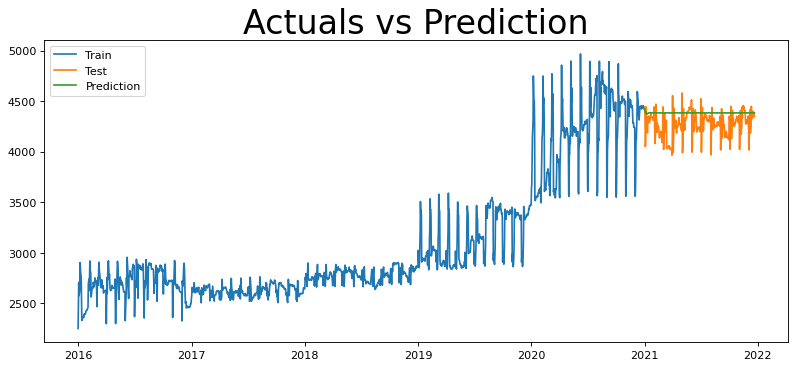

In [76]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [78]:
mse = mean_squared_error(test_pred['predicted_mean'],test['price'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.price)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.price)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  26587.957169584257
Root Mean Squared Error (RMSE) =  163.06
Mean Absolute Error (MAE)  =  130.40883232602795
Mean Absolute Percentage Error (MAPE)  =  0.029748293740462447


Forecast for the 30 Days

In [79]:
forecast = result.predict(len(df), len(df)+31, type = 'levels')
forecast
index_future_dates = pd.date_range(start='2021-12-21', end = '2022-01-21')
forecast.index=index_future_dates
print(forecast)

2021-12-21    4383.729647
2021-12-22    4383.729647
2021-12-23    4383.729647
2021-12-24    4383.729647
2021-12-25    4383.729647
2021-12-26    4383.729647
2021-12-27    4383.729647
2021-12-28    4383.729647
2021-12-29    4383.729647
2021-12-30    4383.729647
2021-12-31    4383.729647
2022-01-01    4383.729647
2022-01-02    4383.729647
2022-01-03    4383.729647
2022-01-04    4383.729647
2022-01-05    4383.729647
2022-01-06    4383.729647
2022-01-07    4383.729647
2022-01-08    4383.729647
2022-01-09    4383.729647
2022-01-10    4383.729647
2022-01-11    4383.729647
2022-01-12    4383.729647
2022-01-13    4383.729647
2022-01-14    4383.729647
2022-01-15    4383.729647
2022-01-16    4383.729647
2022-01-17    4383.729647
2022-01-18    4383.729647
2022-01-19    4383.729647
2022-01-20    4383.729647
2022-01-21    4383.729647
Freq: D, Name: predicted_mean, dtype: float64


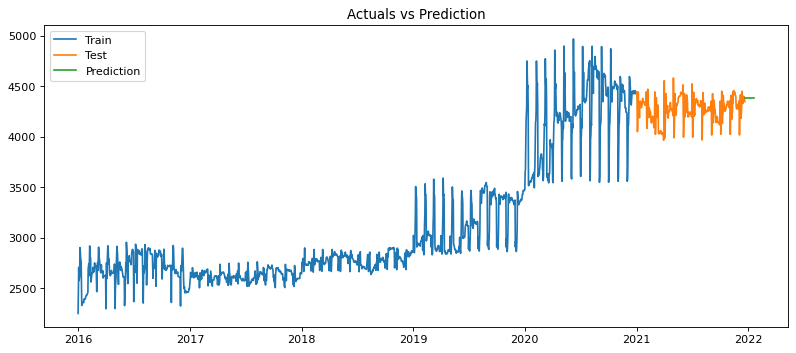

In [80]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

<AxesSubplot:>

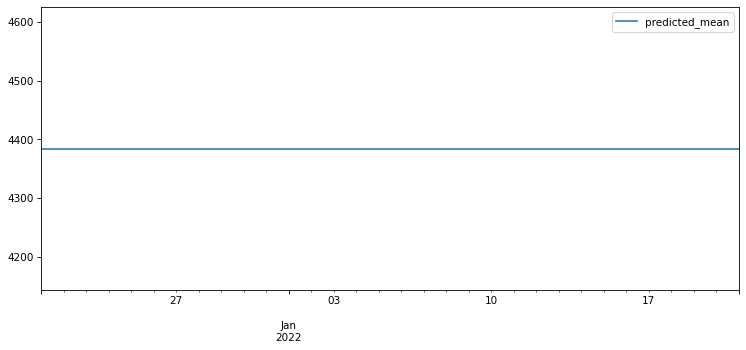

In [81]:
forecast.plot(figsize=(12,5), legend=True)

#### SARIMA

In [82]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [95]:
model_SA = sm.tsa.SARIMAX(train['price'], order=(0,1,2), seasonal_order=(1,1,1,22))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                price   No. Observations:                 1827
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 22)   Log Likelihood              -11169.172
Date:                              Mon, 05 Dec 2022   AIC                          22348.343
Time:                                      17:33:20   BIC                          22375.832
Sample:                                  01-01-2016   HQIC                         22358.489
                                       - 12-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0070      0.017      0.414      0.679      -0.026       0.040
ma.L2         -0.1513      0.019     -7.943      0.000      -0.189      -0.114
ar.S.L22      -0.0054      0.026     -0.213      0.832      -0.056       0.045
ma.S.L22      -0.9993      0.269     -3.720      0.000      -1.526      -0.473
sigma2      1.325e+04   3487.384      3.799      0.000    6414.961    2.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             44803.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                            -1.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+354,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
date,
2021-01-01,4438.091605
2021-01-02,4438.079562
2021-01-03,4436.990077
2021-01-04,4460.085714
2021-01-05,4457.025072
...,...
2021-12-17,4840.693634
2021-12-18,4856.702085
2021-12-19,4855.184592


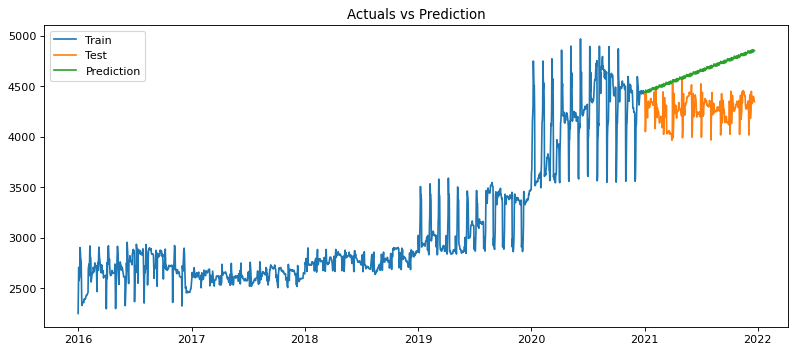

In [97]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [98]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['price'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.price)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.price)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  168824.29672796206
Root Mean Squared Error (RMSE) =  410.88
Mean Absolute Error (MAE)  =  382.4676952267998
Mean Absolute Percentage Error (MAPE)  =  0.08175801672013923


Forecast for next 30 Days

In [99]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2021-12-21', end = '2022-01-21')
forecast_SA.index=index_future_dates
print(forecast_SA)

2021-12-21    4873.980917
2021-12-22    4870.712492
2021-12-23    4868.887696
2021-12-24    4860.417750
2021-12-25    4855.642606
2021-12-26    4870.977259
2021-12-27    4870.199289
2021-12-28    4853.311610
2021-12-29    4869.014761
2021-12-30    4878.278357
2021-12-31    4876.378357
2022-01-01    4855.049212
2022-01-02    4869.126341
2022-01-03    4879.688605
2022-01-04    4886.428241
2022-01-05    4878.253389
2022-01-06    4861.001135
2022-01-07    4866.588804
2022-01-08    4882.597256
2022-01-09    4881.079763
2022-01-10    4878.755389
2022-01-11    4876.905295
2022-01-12    4899.876088
2022-01-13    4896.607662
2022-01-14    4894.782867
2022-01-15    4886.312921
2022-01-16    4881.537777
2022-01-17    4896.872429
2022-01-18    4896.094459
2022-01-19    4879.206780
2022-01-20    4894.909931
2022-01-21    4904.173528
Freq: D, Name: predicted_mean, dtype: float64


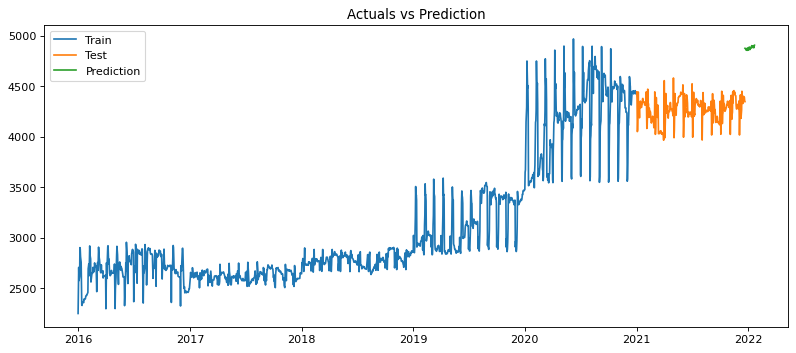

In [100]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

### Holt Method

In [101]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [102]:
'''Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.
#### Set the value of Alpha and define m (Time Period)'''
m = 22
alpha = 1/(2*m)

<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='date'>

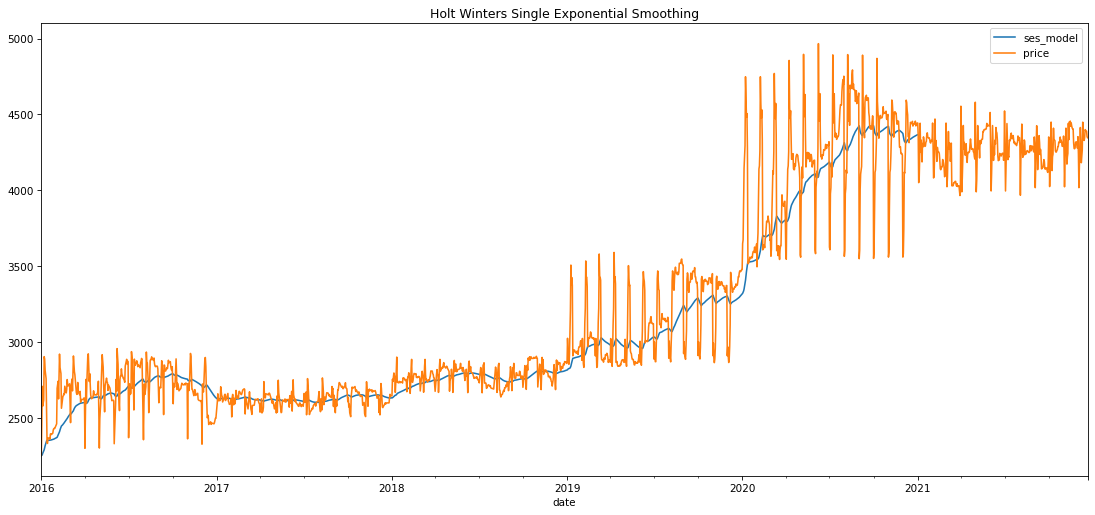

In [103]:
# Single/Simple Exponential Method
df['ses_model'] = SimpleExpSmoothing(train["price"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
df[['ses_model','price']].plot(title='Holt Winters Single Exponential Smoothing', legend=True)
# df2['ses_model']

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend'}, xlabel='date'>

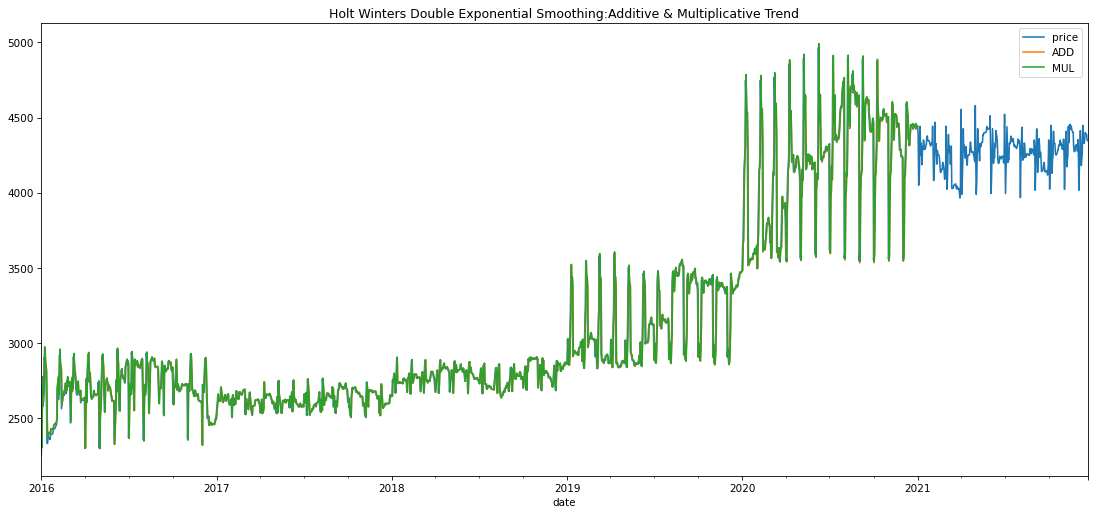

In [104]:
df['ADD'] = ExponentialSmoothing(train['price'],trend='add').fit().fittedvalues
df['MUL'] = ExponentialSmoothing(train['price'],trend='mul').fit().fittedvalues
df[['price','ADD','MUL']].plot(title='Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend')

In [143]:
# Fit the model tend='mul', season='mul'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=11).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

date
2021-01-01    4447.777986
2021-01-02    4459.347875
2021-01-03    4477.819449
2021-01-04    4482.234955
2021-01-05    4492.427348
                 ...     
2021-12-17    6912.134178
2021-12-18    6905.197197
2021-12-19    6916.886629
2021-12-20    6934.879344
2021-12-21    6963.605101
Length: 355, dtype: float64


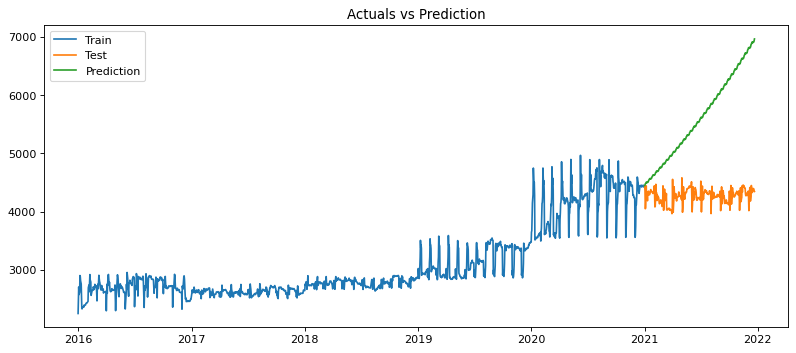

In [144]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [145]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  2321437.0076641925
Root Mean Squared Error (RMSE) =  1523.63
Mean Absolute Error (MAE)  =  1349.1834459503355
Mean Absolute Percentage Error (MAPE)  =  0.31626201136127857


In [149]:
# Fit the model tend='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]  

 # To print ouput in date format
print(test_predictions)

date
2021-01-01    4446.380371
2021-01-02    4435.150447
2021-01-03    4431.307997
2021-01-04    4437.532658
2021-01-05    4448.773809
                 ...     
2021-12-17    5269.509325
2021-12-18    5276.455414
2021-12-19    5289.365071
2021-12-20    5304.341230
2021-12-21    5285.426380
Length: 355, dtype: float64


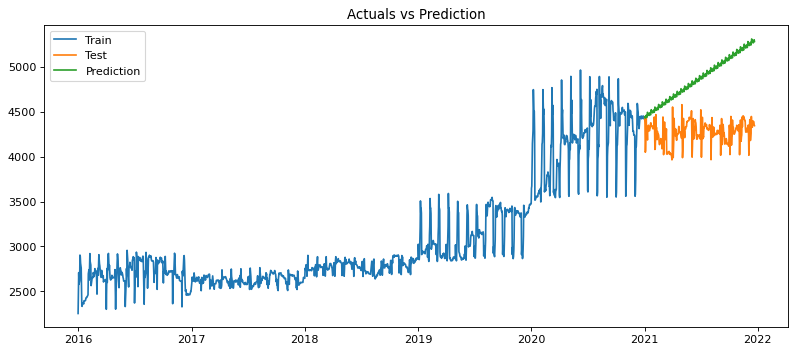

In [150]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [151]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  426933.22471797734
Root Mean Squared Error (RMSE) =  653.4
Mean Absolute Error (MAE)  =  602.3133119143338
Mean Absolute Percentage Error (MAPE)  =  0.1416880912405152


In [113]:
# Fit the model tend='mul', season='add'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

date
2021-01-01    4451.414135
2021-01-02    4452.613096
2021-01-03    4457.614296
2021-01-04    4466.045690
2021-01-05    4478.288760
                 ...     
2021-12-17    6918.853869
2021-12-18    6930.384222
2021-12-19    6945.730153
2021-12-20    6964.298815
2021-12-21    6962.313866
Length: 355, dtype: float64


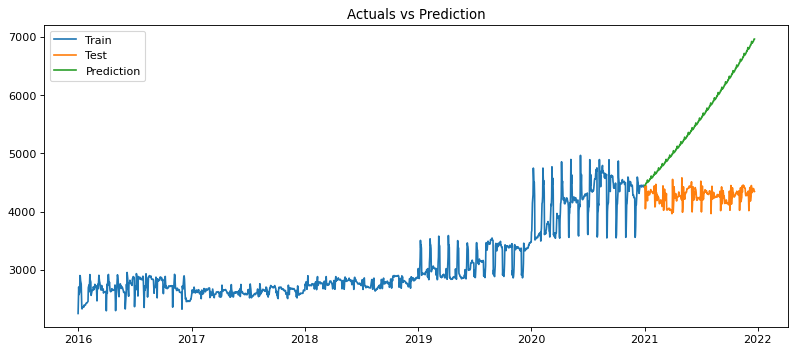

In [114]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [152]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  426933.22471797734
Root Mean Squared Error (RMSE) =  653.4
Mean Absolute Error (MAE)  =  602.3133119143338
Mean Absolute Percentage Error (MAPE)  =  0.1416880912405152


In [153]:
# Fit the model tend='add', season='add'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=10).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

date
2021-01-01    4475.085887
2021-01-02    4489.098618
2021-01-03    4490.484575
2021-01-04    4483.384290
2021-01-05    4478.089291
                 ...     
2021-12-17    5468.832393
2021-12-18    5482.845125
2021-12-19    5484.231082
2021-12-20    5477.130796
2021-12-21    5471.835797
Length: 355, dtype: float64


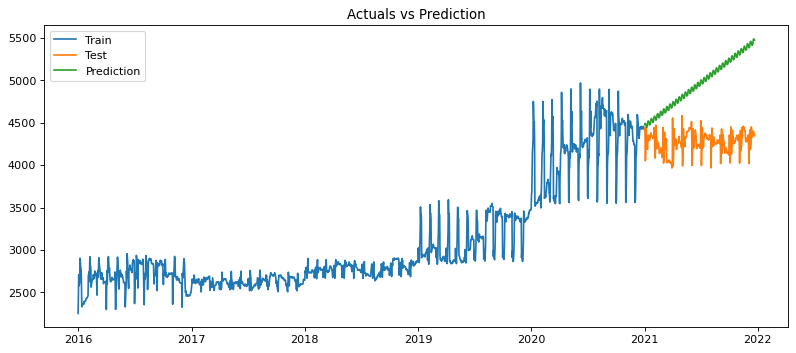

In [154]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [155]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  566002.2540008896
Root Mean Squared Error (RMSE) =  752.33
Mean Absolute Error (MAE)  =  692.9884920303225
Mean Absolute Percentage Error (MAPE)  =  0.16290048049103398


EMA

In [156]:
df['EMA'] = train['price'].ewm(span=22).mean()

In [157]:
df['EMA']

date
2016-01-01    2252.600000
2016-01-02    2358.138636
2016-01-03    2485.550585
2016-01-04    2511.848585
2016-01-05    2532.287586
                 ...     
2021-12-17            NaN
2021-12-18            NaN
2021-12-19            NaN
2021-12-20            NaN
2021-12-21            NaN
Name: EMA, Length: 2182, dtype: float64

In [158]:
df['EMA_t'] = test['price'].ewm(span=22).mean()

In [159]:
df['EMA_t']

date
2016-01-01            NaN
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05            NaN
                 ...     
2021-12-17    4324.030529
2021-12-18    4329.723526
2021-12-19    4334.921481
2021-12-20    4336.589178
2021-12-21    4337.450989
Name: EMA_t, Length: 2182, dtype: float64

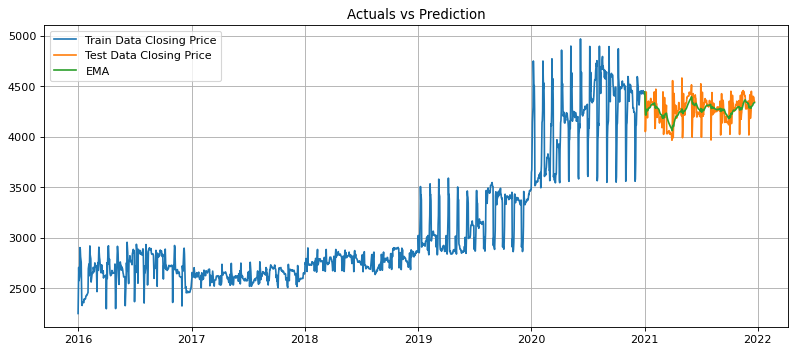

In [160]:
plt.figure(figsize=(12,5), dpi=80)
plt.grid(True)
plt.plot(train['price'],label='Train Data Closing Price')
plt.plot(test['price'],label='Test Data Closing Price')
plt.plot(df['EMA_t'],label='EMA')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.legend(loc=2)

In [161]:
df['EMA_t'].dropna()

date
2021-01-01    4443.100000
2021-01-02    4402.431818
2021-01-03    4274.229663
2021-01-04    4214.811582
2021-01-05    4213.095690
                 ...     
2021-12-17    4324.030529
2021-12-18    4329.723526
2021-12-19    4334.921481
2021-12-20    4336.589178
2021-12-21    4337.450989
Name: EMA_t, Length: 355, dtype: float64

In [162]:
mse = mean_squared_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  8401.060523832122
Root Mean Squared Error (RMSE) =  91.66
Mean Absolute Error (MAE)  =  66.8213045119925
Mean Absolute Percentage Error (MAPE)  =  0.015729767829439883
